<a href="https://colab.research.google.com/github/jvo012/ads-500b-project/blob/test-1/data_analytics_12april.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Part 1: Data Importing and Pre-processing

In [23]:
# 1.1 Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

df = pd.read_csv('https://raw.githubusercontent.com/jvo012/ads-500b-project/main/house_sales.csv')

In [24]:
# Identify the data types of key variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [25]:
# 1.2 Clean, wrangle, and handle missing data
# 1.3 Transform data appropriately using techniques such as aggregation, normalization, and feature construction
# 1.4 Reduce redundant data and perform need based discretization

# Dropped "ID", "long", and "lat" columns
# These columns are irrelevant values that are too specific and do not fit the requirements needed for our analysis on the house market.
df.drop(["id","long","lat"], axis=1, inplace = True)

# Column "yr_renovated" converted to binary values (0=No, 1=Yes)
# The year of renovation is an irrelevant observation. Instead, homes that were renovated have the value 1 (True), unrenovated homes kept the value 0 (False) to observe if a relationship exists with renovations and the housing market.
df['yr_renovated'] = (df['yr_renovated'] > 0).astype(bool)
df['sqft_basement'] = (df['sqft_basement'] > 0).astype(bool)

# Bedrooms exceeding number 6 replaced with 6
# Eliminated outliers by replacing values exceeding 6.
df['bedrooms'] = np.where(df['bedrooms'] > 6, 6, df['bedrooms'])

# Converted data type to date_time
# Changed the data type in order to use for further analysis.
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d %H:%M:%S')

# All values in "bathrooms" and "floors" rounded to whole numbers for consistency.
df['bathrooms'] = df['bathrooms'].round()
df['floors'] = df['floors'].round()

In [26]:
# Verify columns do not contain "0" value
print("Price 0 values: ", '0' in df.price.values)
print("Bathroom 0 values: ", '0' in df.bathrooms.values)
print("Bedroom 0 values: ", '0' in df.bedrooms.values)
print("Sqft_living 0 values: ", '0' in df.sqft_living.values)
print("Sqft_lot 0 values: ", '0' in df.sqft_lot.values)
print("Floors 0 values: ", '0' in df.floors.values)

Price 0 values:  False
Bathroom 0 values:  False
Bedroom 0 values:  False
Sqft_living 0 values:  False
Sqft_lot 0 values:  False
Floors 0 values:  False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed;

In [27]:
# Replace missing bedroom and bathroom count by the mean
df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)
df['bathrooms'].replace(np.nan, df['bathrooms'].mean(), inplace=True)

In [28]:
# Display column unique count to check for outliers
print("Bedroom unique count:", df.bedrooms.unique())
print("Bathrooms unique count:", df.bathrooms.unique())
print("Floors unique count:", df.floors.unique())
print("Waterfront unique count:", df.waterfront.unique())
print("View unique count:", df.view.unique())
print("Condition unique count:", df.condition.unique())
print("Grade unique count:", df.grade.unique())

Bedroom unique count: [3.         2.         4.         5.         3.36735192 1.
 6.         0.        ]
Bathrooms unique count: [1.         2.         3.         4.         2.05753225 5.
 0.         6.         8.         7.        ]
Floors unique count: [1. 2. 3. 4.]
Waterfront unique count: [0 1]
View unique count: [0 3 4 2 1]
Condition unique count: [3 5 4 1 2]
Grade unique count: [ 7  6  8 11  9  5 10 12  4  3 13  1]


In [29]:
# Mode of "view" column
print("View mode: ", df["view"].mode())

# Replace all "view" column values greater than 1 with the mode, "0"
df['view'].values[df['view'] > 1] = 0

# Confirm "view" unique count to confirm command above worked and check for remaining outliers
print("View unique count:", df.view.unique())

View mode:  0    0
dtype: int64
View unique count: [0 1]


In [30]:
# Determine the index corresponding to the max value of "bedrooms"
x = df['bedrooms'].idxmax()

# Display "sqft_lot" at max value of bedrooms
print("Sqft_lot at max value of bedrooms: ", df.loc[x, 'sqft_living'])

# 33 bedroom count highly unlikely given the corresponding "sqft_living" value; likely data entry error
# Replace "33" bedroom column count by "3"
# df["bedrooms"].replace({"33": "3"}, inplace=True)
df['bedrooms'] = df['bedrooms'].replace(['33'], '3')

# Confirm "bedroom" unique count to confirm command above worked and check for remaining outliers
print("Bedroom unique count:", df.bedrooms.unique())

Sqft_lot at max value of bedrooms:  2300.0
Bedroom unique count: [3.         2.         4.         5.         3.36735192 1.
 6.         0.        ]


Part 2: Data Analysis and Visualization

In [31]:
df.head()
# 2.1 Identify categorical, ordinal, and numerical variables within data

# Categorical data: Zipcode
# Ordinal data: condition, grade
# Numerical data: Price, Bedrooms, Bathroom, sqft_living, sqft_lot, sqft_above, floors, yr_built, sqft_living15, sqft_lot15
# Dates are not categorical, ordinal, nor numerical
# Waterfront, view, sqft_basement, yr_renovated are boolean

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.0,1180.0,5650.0,1.0,0,0,3,7,1180,False,1955,False,98178,1340,5650
1,2014-12-09,538000.0,3.0,2.0,2570.0,7242.0,2.0,0,0,3,7,2170,True,1951,True,98125,1690,7639
2,2015-02-25,180000.0,2.0,1.0,770.0,10000.0,1.0,0,0,3,6,770,False,1933,False,98028,2720,8062
3,2014-12-09,604000.0,4.0,3.0,1960.0,5000.0,1.0,0,0,5,7,1050,True,1965,False,98136,1360,5000
4,2015-02-18,510000.0,3.0,2.0,1680.0,8080.0,1.0,0,0,3,8,1680,False,1987,False,98074,1800,7503


In [32]:
# 2.2 Provide measures of centrality and distribution with visualizations

#Key statistics of studied variables
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.367352,2.057532,2081.073697,1.517982e+04,1.534956,0.007542,0.015361,3.409430,7.656873,1788.390691,1971.005136,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.866998,0.735084,915.043176,4.148617e+04,0.554742,0.086517,0.122987,0.650743,1.175459,828.090978,29.373411,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,1900.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1920.000000,7.620000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,6.000000,8.000000,12050.000000,1.651359e+06,4.000000,1.000000,1.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [33]:
# 2.3 Diagnose for correlations between variables and determine independent and dependent variables

#Define correlation matrix
cor_matrix = df.corr().abs()

#Only reflect upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

#Only print values in which correlation coefficient exceeds +/- 0.7 (4/10 - still wip)
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
#print(to_drop)

               price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price            NaN  0.311153   0.510003     0.701579  0.088422  0.244906   
bedrooms         NaN       NaN   0.477178     0.581566  0.030130  0.182953   
bathrooms        NaN       NaN        NaN     0.683094  0.086012  0.318674   
sqft_living      NaN       NaN        NaN          NaN  0.168363  0.323410   
sqft_lot         NaN       NaN        NaN          NaN       NaN  0.002839   
floors           NaN       NaN        NaN          NaN       NaN       NaN   
waterfront       NaN       NaN        NaN          NaN       NaN       NaN   
view             NaN       NaN        NaN          NaN       NaN       NaN   
condition        NaN       NaN        NaN          NaN       NaN       NaN   
grade            NaN       NaN        NaN          NaN       NaN       NaN   
sqft_above       NaN       NaN        NaN          NaN       NaN       NaN   
sqft_basement    NaN       NaN        NaN          NaN       NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


Text(0, 0.5, 'Price')

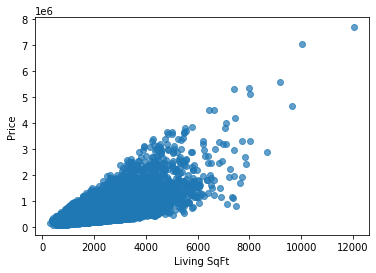

In [34]:
# 2.4 Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

# Scatterplot for sqft_living (X) and price (Y)
plt.figure()
plt.scatter(df.sqft_living, df.price, alpha=0.7)

# Label axis
plt.xlabel('Living SqFt')
plt.ylabel('Price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4dc5548d0>]],
      dtype=object)

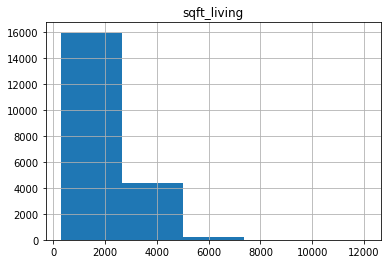

In [35]:
# Histogram of living square footage
df.hist(column = 'sqft_living', bins = 5)

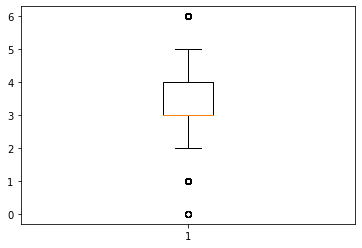

In [36]:
# Boxplot to identify bedroom numbers distribution
plt.boxplot(df['bedrooms'])
plt.show()

In [ ]:
# Bedrooms x bathrooms x price

Part 3: Data Analytics

In [40]:
# 3.1 Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables

# Supervised learning: Predict price based on amount of bedrooms from bathrooms

# 3.2 Train, test, and provide accuracy and evaluation metrics for model results
# Import library
import statsmodels.api as sm

Y = df.price # Dependent variable
X = df.bedrooms # Independent variable
X = sm.add_constant(X) # Add constant term to predictor

# Establish linear regression model results
linreg_model = sm.OLS(Y,X).fit()
print(linreg_model.summary())

X_prime = np.linspace(df.bedrooms.min(), df.bedrooms.max(),100)
X_prime = sm.add_constant(X_prime)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2317.
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:21:38   Log-Likelihood:            -3.0650e+05
No. Observations:               21613   AIC:                         6.130e+05
Df Residuals:                   21611   BIC:                         6.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.642e+04   9518.646     10.129      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


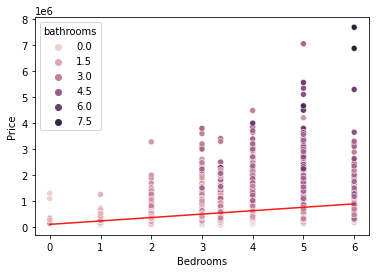

In [46]:
import seaborn as sns
# Calculate predicted value
Y_hat = linreg_model.predict(X_prime)

# Graph scatterplot for relationship between total assets and customers served while considering airlines
sns.scatterplot(x = df.bedrooms, y = df.price, hue = df.bathrooms)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) #Shift Airline key to upper left

# Create labels for x and y axis
plt.xlabel("Bedrooms")
plt.ylabel("Price")

# Plot linear regression line
plt.plot(X_prime[:,1],Y_hat, 'red', alpha = 0.9)